In [ ]:
from matplotlib import ticker
import pandas as pd
from tqdm.auto import trange
from gridworld import make_grid_world
from qlearn import QLearner

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy.stats import entropy

sns.set_theme(
    rc={
        'axes.edgecolor': 'gray',
        'axes.linewidth': 1,
        'font.size': 15,
        "font.family": "Helvetica",
    }
)
plt.rcParams['text.usetex'] = True


: 

In [5]:
# make grid_world

grid_config = {
    'shape': (8, 8),
    'default_reward': 0,
    'goal': (0, -1),
    'goal_reward': 1,
    'trap': (1, -1),
    'trap_reward': -1,
    'obstacles': [(1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7)],
    'noise': 0.1
}

gw = make_grid_world(grid_config)

  0%|          | 0/100 [00:00<?, ?it/s]

Text(0.5, 1.0, '$\\log \\beta=-6 $')

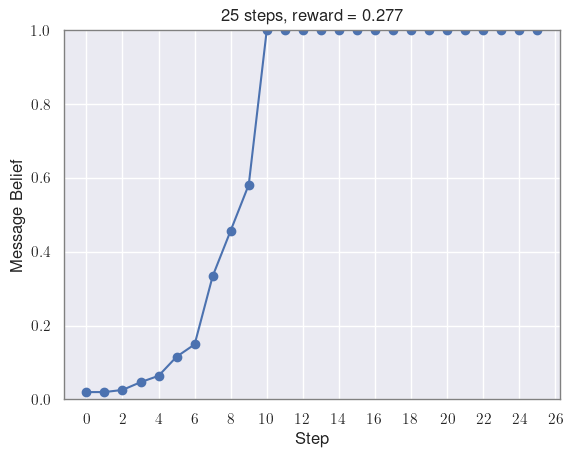

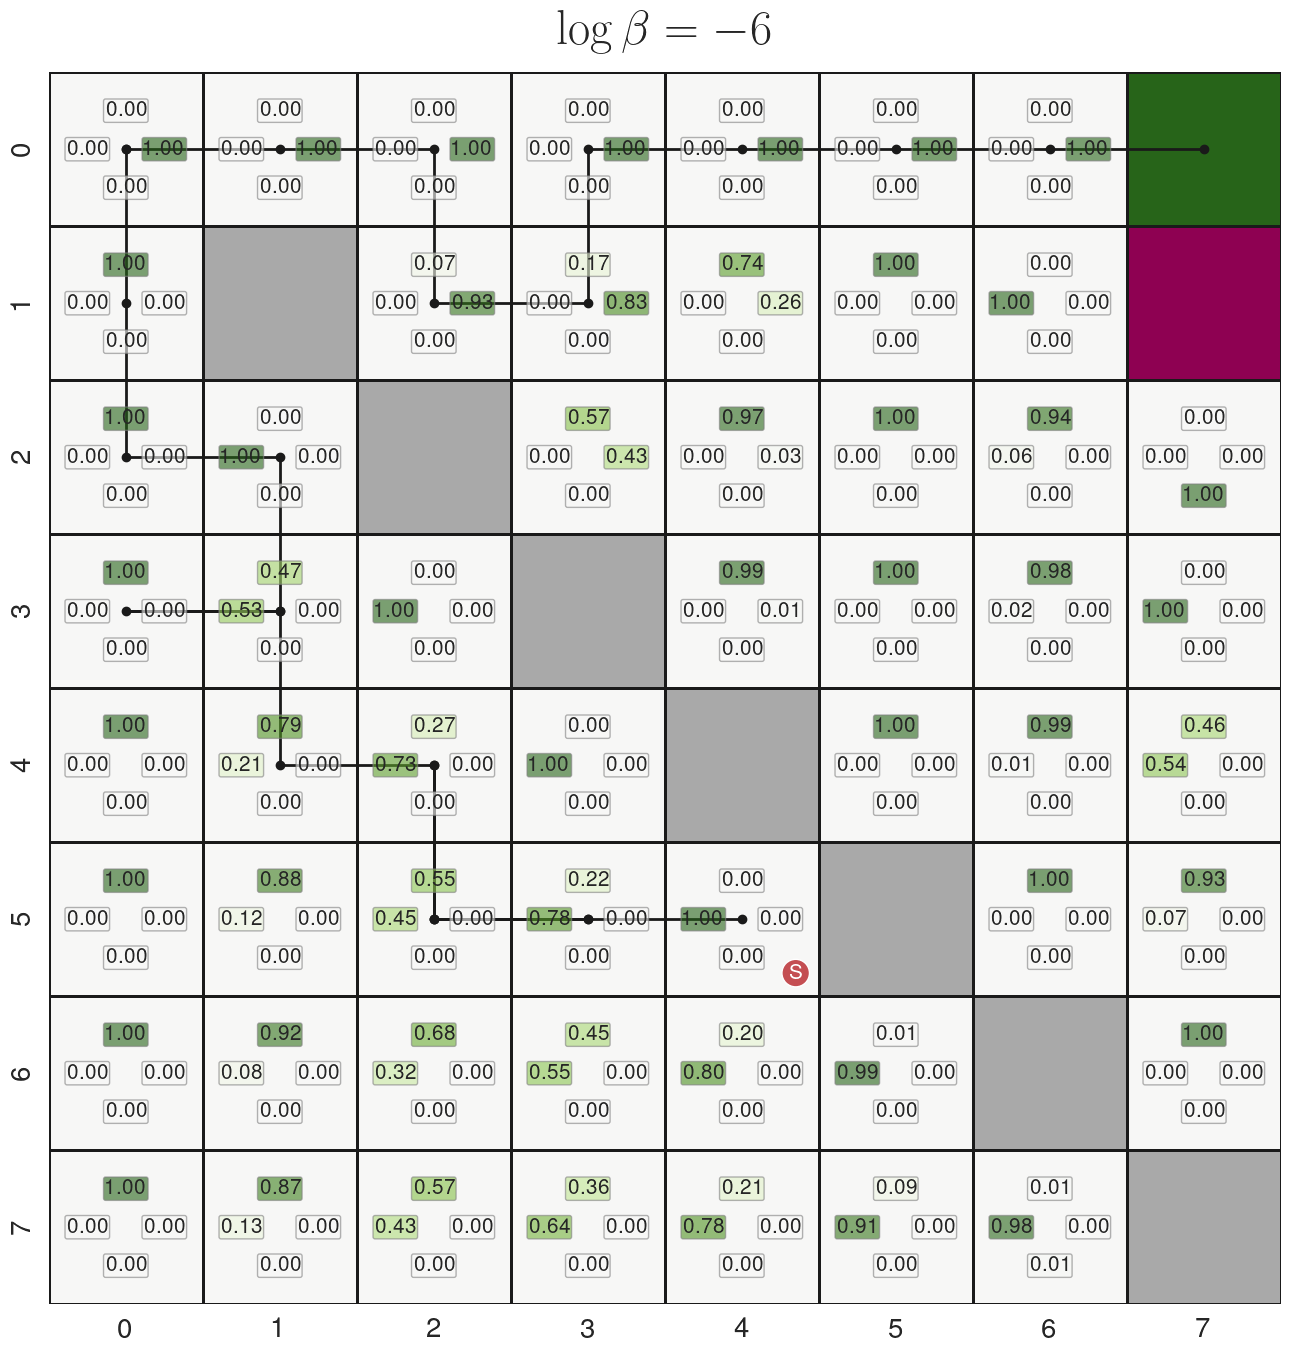

In [11]:
# find max-ent policy 

discount = 0.95
log_beta = -6

beta = np.exp(log_beta)
qpolicy, q_grids = gw.run_qvalue_iterations(iterations=100, discount=discount, beta=beta)
policy = qpolicy[..., -1]

# perform actions based on message-conditional policy
message = 1
message_size = 50
message_prior = np.ones(message_size)/message_size
start = (5, 4)

states, actions, reward, believes, mutual_infos, joints = gw.run_message_conditional_policy(
    policy=policy,
    message=message,
    message_prior=message_prior,
    start=start,
    max_steps=1_000, 
    discount=discount,
    compression_rate=1,
)

# plot message belief
fig, ax = plt.subplots()
ax.plot(believes[:, message], '-o')
ax.set(xlabel='Step', ylabel='Message Belief', ylim=(0, 1),
        title=f'{len(actions)} steps, {reward = :.3f}')
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))

# plot trajectory
fig, ax = gw.plot_policy2(policy, states, actions=None, start=start)
ax.set_title(fr'$\log \beta={log_beta} $', fontdict={'fontsize':35}, pad=20)


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

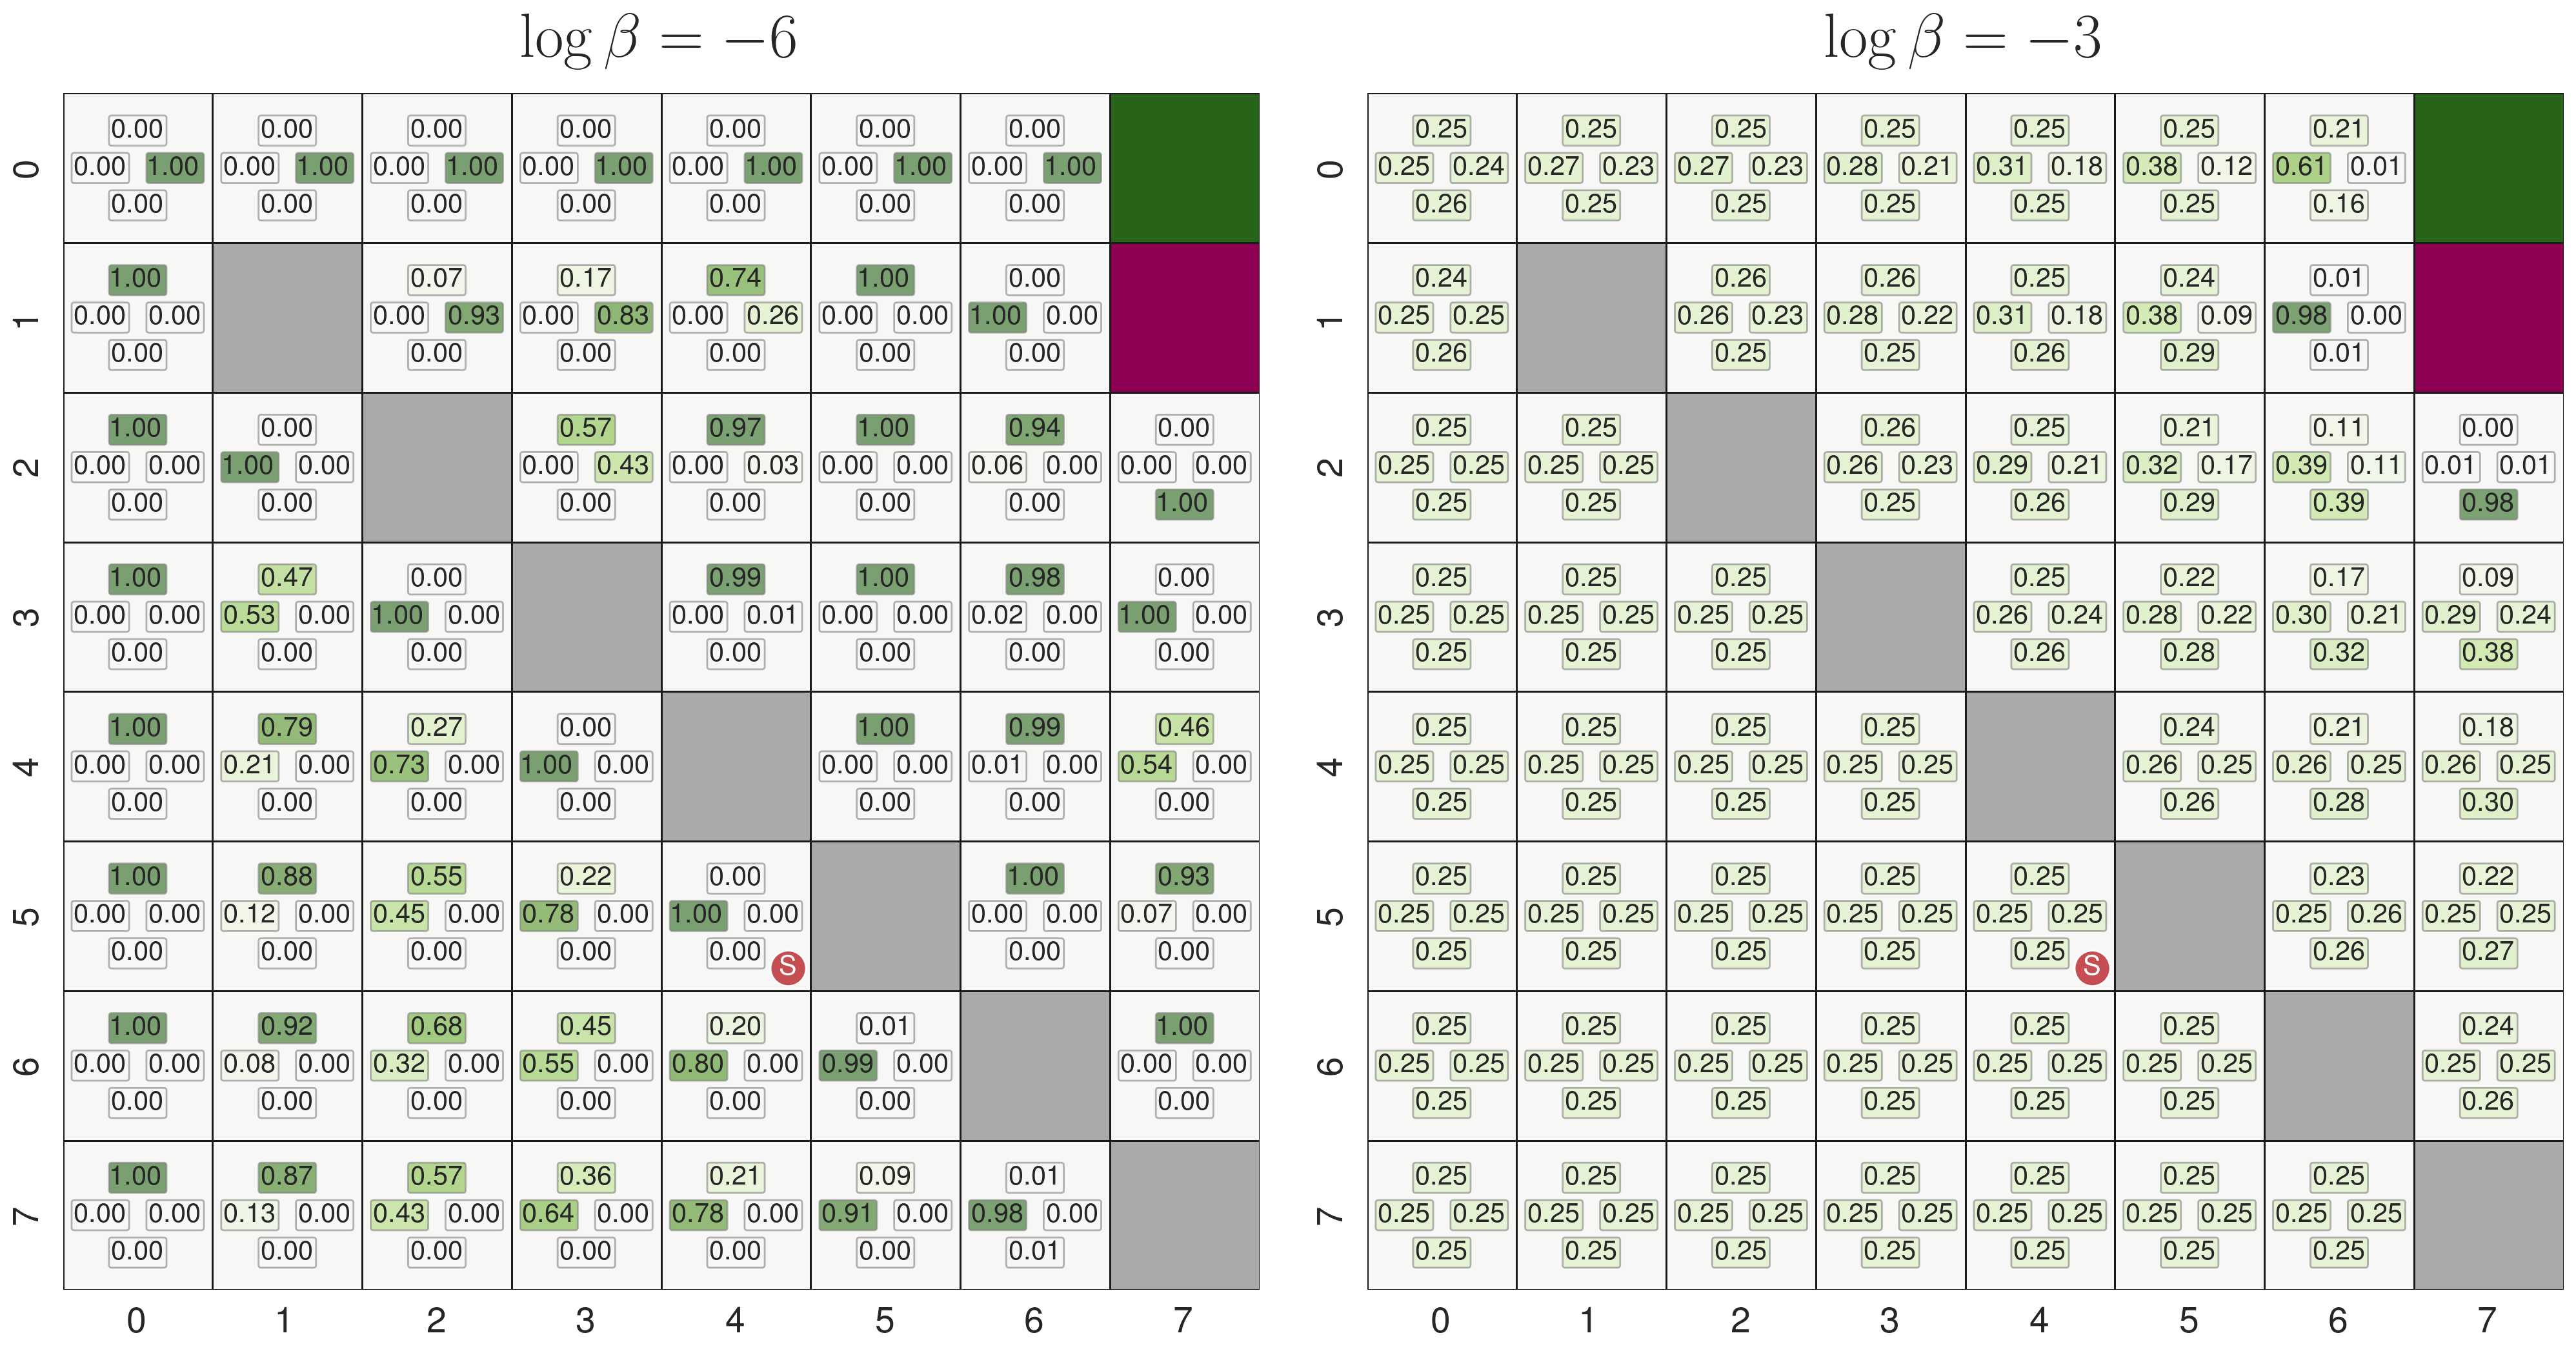

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(25, 15), dpi=200, gridspec_kw={'wspace':.09})

discount = 0.95
start = (5, 4)
for log_beta, ax in zip([-6, -3], axs):
    
    beta = np.exp(log_beta)

    qpolicy, q_grids = gw.run_qvalue_iterations(iterations=100, discount=discount, beta=beta)
    policy = qpolicy[..., -1]

    gw.plot_policy2(policy, states=None, actions=None, start=start, ax=ax)
    ax.set_title(fr'$\log \beta={log_beta} $', fontdict={'fontsize':35}, pad=20)